# Imports

In [2]:
import LightPipes as lp
import numpy as np
import matplotlib.pyplot as plt

# FFT Propagation

This kind of propagation uses the Fresnel approximation to relate the Fourier Transforms of the starting beam to the diffracted beam (CMPLT - Notion).

In LightPipes the algorithm assumes that outside the grid there is a square waveguide with reflecting walls at the grid edges, and as such to approximate a free space propagation the intensity of the beam near the edges must be close to zero.

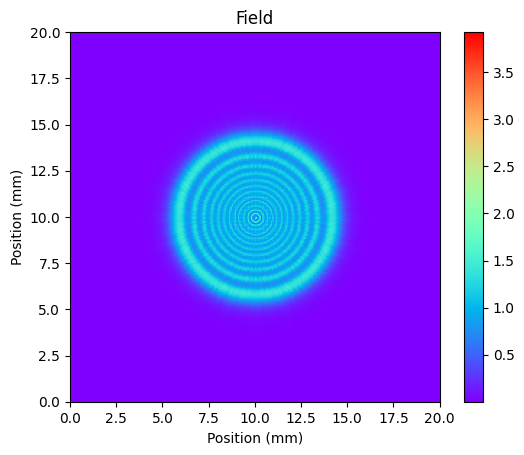

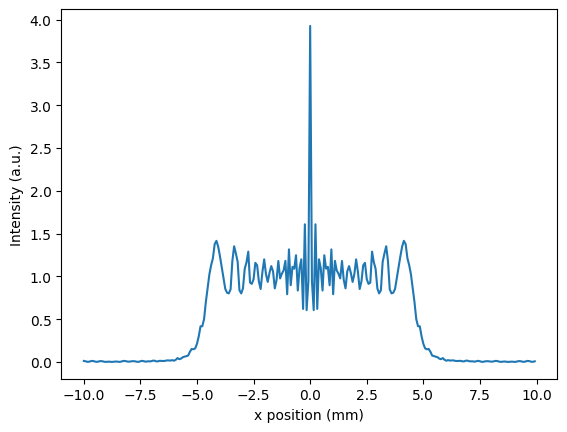

In [50]:
# Create the Field
size = 20 * lp.mm
wave = 1 * lp.um
N = 256

Field = lp.Begin(size, wave, N)

# Create a circular aperture
Field = lp.CircAperture(Field, 5 * lp.mm, 0, 0)

# Propagate the beam
dist = 1 * lp.m

Field = lp.Forvard(Field, dist)

# Draw the Field in 2D
I = lp.Intensity(Field, flag=0)

plt.imshow(I, extent=(0, size / lp.mm, 0, size / lp.mm), cmap="rainbow")
plt.colorbar()
plt.title("Field")
plt.xlabel('Position (mm)')
plt.ylabel('Position (mm)')
plt.show()

# Graph the intensity of the field
xx = (np.arange(N)/N * size - (size / 2)) * (1/lp.mm)

plt.plot(xx, I[N//2])
plt.xlabel("x position (mm)")
plt.ylabel("Intensity (a.u.)")
plt.show()

Near field propagation:

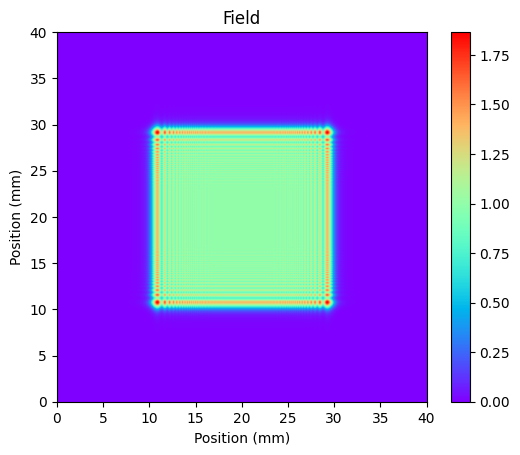

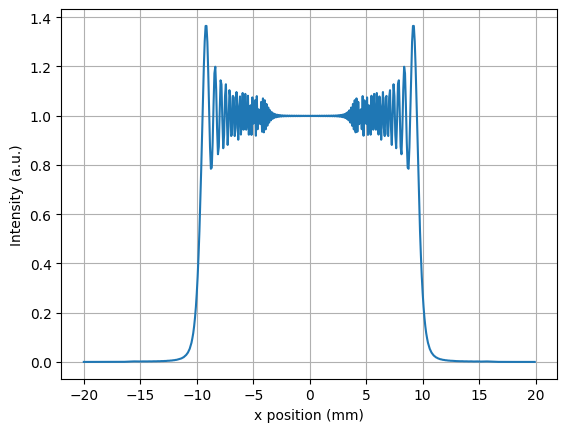

In [51]:
# Create the Field
size = 40 * lp.mm
wave = 1 * lp.um
N = 512

Field = lp.Begin(size, wave, N)

# Create a circular aperture
Field = lp.RectAperture(Field, 20 * lp.mm, 20 * lp.mm)

# Propagate the beam
dist = 1 * lp.m

Field = lp.Forvard(Field, dist)

# Draw the Field in 2D
I = lp.Intensity(Field, flag=0)

plt.imshow(I, extent=(0, size / lp.mm, 0, size / lp.mm), cmap="rainbow")
plt.colorbar()
plt.title("Field")
plt.xlabel('Position (mm)')
plt.ylabel('Position (mm)')
plt.show()

# Graph the intensity of the field
xx = (np.arange(N)/N * size - (size / 2)) * (1/lp.mm)

plt.plot(xx, I[N//2])
plt.xlabel("x position (mm)")
plt.ylabel("Intensity (a.u.)")
plt.grid("on")
plt.show()

Far field propagation:

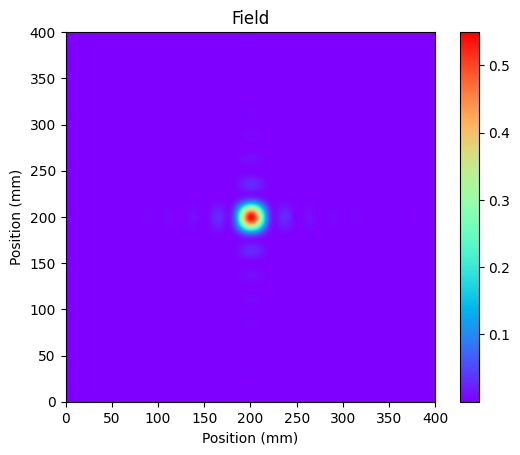

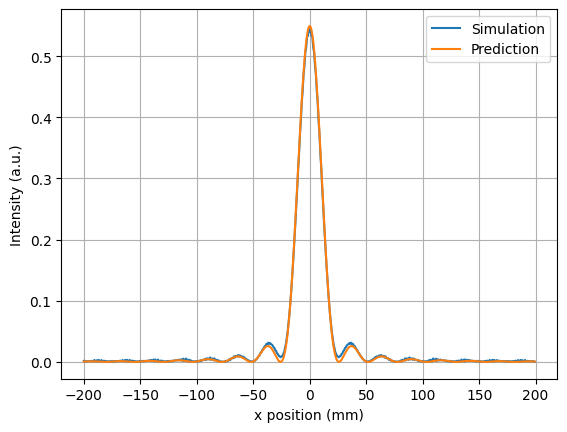

In [72]:
# Create the Field
size = 400 * lp.mm
wave = 1 * lp.um
k = 2 * np.pi /wave

N = 512

Field = lp.Begin(size, wave, N)

# Create a circular aperture
Field = lp.RectAperture(Field, 20 * lp.mm, 20 * lp.mm)

# Propagate the beam
dist = 500 * lp.m

Field = lp.Forvard(Field, dist)

# Draw the Field in 2D
I = lp.Intensity(Field, flag=0)

plt.imshow(I, extent=(0, size / lp.mm, 0, size / lp.mm), cmap="rainbow")
plt.colorbar()
plt.title("Field")
plt.xlabel('Position (mm)')
plt.ylabel('Position (mm)')
plt.show()

# Graph the intensity of the field
xx = (np.arange(N)/N * size - (size / 2))

plt.plot(xx * (1/lp.mm), I[N//2], label="Simulation")
plt.title("Intensity profile through the center")
plt.xlabel("x position (mm)")
plt.ylabel("Intensity (a.u.)")
plt.grid("on")

# Comparision with sinc^2 function
tt = xx / dist
bb = k * 20 * lp.mm / 6.5 * tt
I0 = np.max(I) * (np.sinc(bb)) ** 2

plt.plot(xx * (1/lp.mm), I0, label="Prediction")
plt.legend()
plt.show()

Backwards propagation:

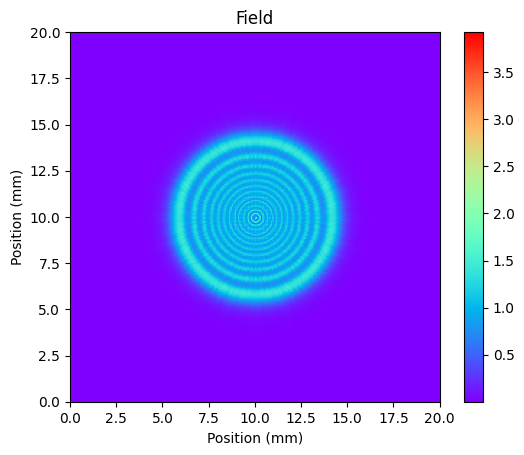

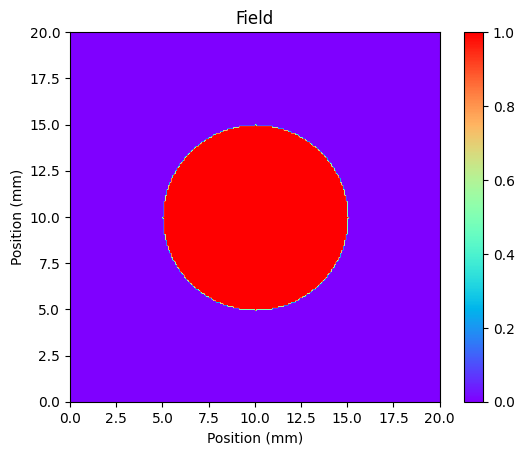

In [73]:
# Create the Field
size = 20 * lp.mm
wave = 1 * lp.um
N = 256

Field = lp.Begin(size, wave, N)

# Create a circular aperture
Field = lp.CircAperture(Field, 5 * lp.mm, 0, 0)

# Propagate the beam forward
dist = 1 * lp.m

Field = lp.Forvard(Field, dist)

# Draw the Field in 2D
I = lp.Intensity(Field, flag=0)

plt.imshow(I, extent=(0, size / lp.mm, 0, size / lp.mm), cmap="rainbow")
plt.colorbar()
plt.title("Field")
plt.xlabel('Position (mm)')
plt.ylabel('Position (mm)')
plt.show()


# Propagate the beam backwards
Field = lp.Forvard(Field, -dist)

# Draw the Field in 2D
I = lp.Intensity(Field, flag=0)

plt.imshow(I, extent=(0, size / lp.mm, 0, size / lp.mm), cmap="rainbow")
plt.colorbar()
plt.title("Field")
plt.xlabel('Position (mm)')
plt.ylabel('Position (mm)')
plt.show()

# Direct Integration as a Convolution

This method directly computes the Kirchoff integral by transforming it to a summation, which can be computed as a convolution using FFT!

This method doesn't have the drawbacks of the method above (which assumes a square waveguide) but has other caveats:
- It can't be used for distances of the order of or smaller then the size of the aperture.
- It is about 2-5 times slower than `Forvard` (but a smaller region may be used!)
- It can't be propagated back.

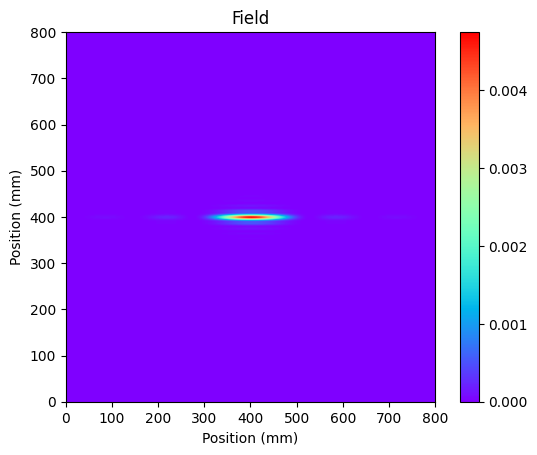

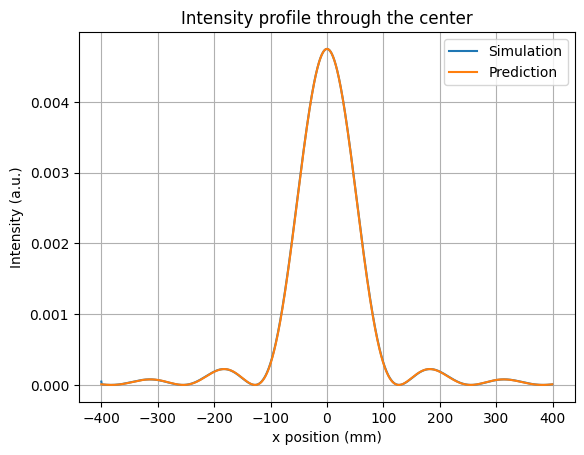

In [104]:
# Create the Field
size = 800 * lp.mm
wave = 1 * lp.um
k = 2 * np.pi / wave
N = 1024

Field = lp.Begin(size, wave, N)

# Create a rectangular aperture
b = 0.02 * lp.mm
l = 20 * lp.mm
Field = lp.RectAperture(Field, b, l)

# Propagate the beam
dist = 200 * lp.m

Field = lp.Fresnel(Field, dist)

# Draw the Field in 2D
I = lp.Intensity(Field, flag=0)

plt.imshow(I, extent=(0, size / lp.mm, 0, size / lp.mm), cmap="rainbow")
plt.colorbar()
plt.title("Field")
plt.xlabel('Position (mm)')
plt.ylabel('Position (mm)')
plt.show()


# Graph the intensity of the field
xx = (np.arange(N)/N * size - (size / 2))

plt.plot(xx * (1/lp.mm), I[N//2], label="Simulation")
plt.title("Intensity profile through the center")
plt.xlabel("x position (mm)")
plt.ylabel("Intensity (a.u.)")
plt.grid("on")

# Comparision with sinc^2 function
tt = xx / dist
bb = k * b / 2 * tt * 25
I0 = np.max(I) * (np.sinc(bb)) ** 2

plt.plot(xx * (1/lp.mm), I0, label="Prediction")
plt.legend()
plt.show()